In [8]:
import pandas as pd
df = pd.read_csv("fraud-detection/FraudData.csv")


#  check for shape of  dataset

In [9]:
print("Shape:", df.shape)


Shape: (1852394, 23)


#  check for column names

In [10]:
print("nColumns:", df.columns)


nColumns: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


#  check for data types

In [5]:
print("\nData Types:", df.dtypes)


Data Types: Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [15]:
 # see some data 
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,weekday
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1


#  convert date time

In [30]:
print("\nData Types:", df.dtypes)


Data Types: Unnamed: 0      int64
cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
hour            int32
day             int32
weekday         int32
dtype: object


# genral statistics

In [21]:
print(df.describe())


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

# removing unnecessary column not needed for our analysis.

In [36]:
df.drop([ 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time'], axis=1, inplace=True)


KeyError: "['first', 'last', 'street', 'dob', 'trans_num', 'unix_time'] not found in axis"

# checking the missing values


In [32]:
#  check for missing values
print(df.isnull().sum())


cc_num        0
merchant      0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
hour          0
day           0
weekday       0
dtype: int64


# count the targert variable in percentage

In [33]:
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))  # percentage


is_fraud
0    1842743
1       9651
Name: count, dtype: int64
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64


In [24]:
print(df.nunique())


Unnamed: 0    1296675
cc_num            999
merchant          693
category           14
amt             60616
first             355
last              486
gender              2
street            999
city              906
state              51
zip               985
lat               983
long              983
city_pop          891
job               497
dob               984
trans_num     1852394
unix_time     1819583
merch_lat     1754157
merch_long    1809753
is_fraud            2
hour               24
day                31
weekday             7
dtype: int64


# Unique Values per Column

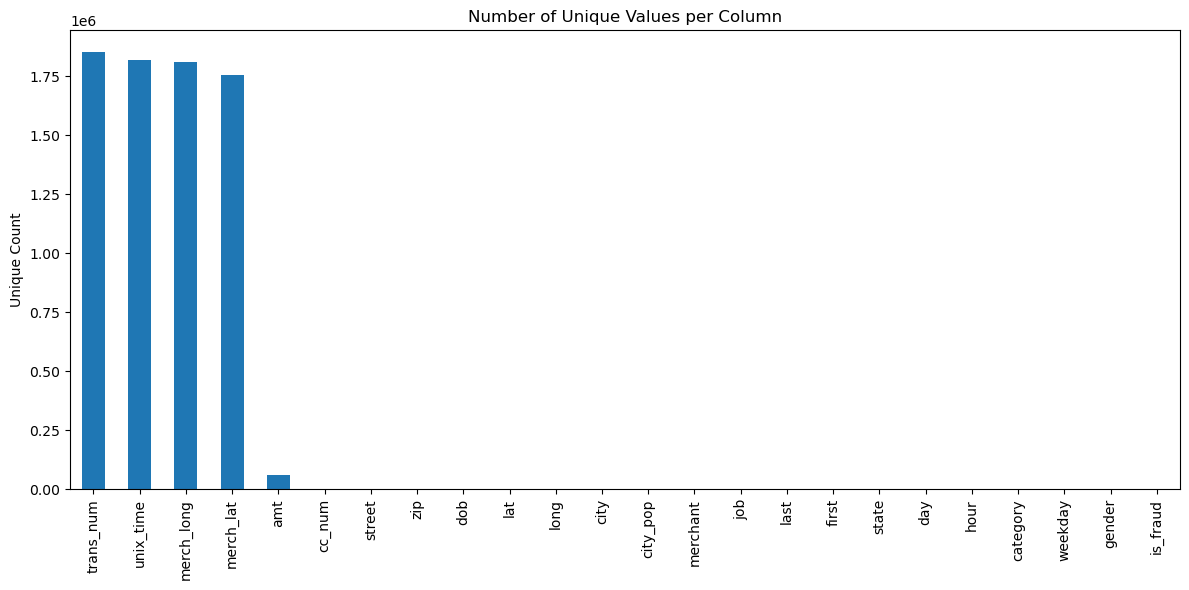

In [16]:
import matplotlib.pyplot as plt

df.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Number of Unique Values per Column')
plt.ylabel('Unique Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Distribution of Target Variable (is_fraud)

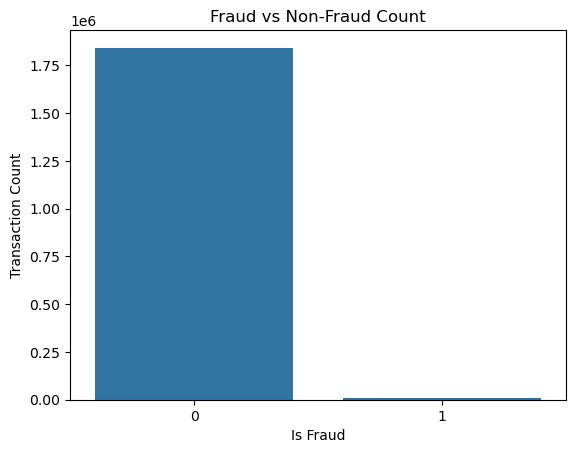

In [17]:
import seaborn as sns

sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Count')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Count')
plt.show()


 # Transaction Amount by Fraud Status

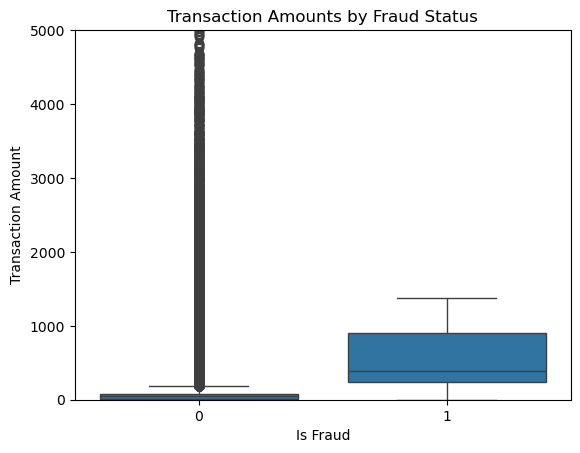

In [38]:
sns.boxplot(data=df, x='is_fraud', y='amt')
plt.ylim(0, 5000)  # Limit outliers for visibility
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.show()


# fraud by hour

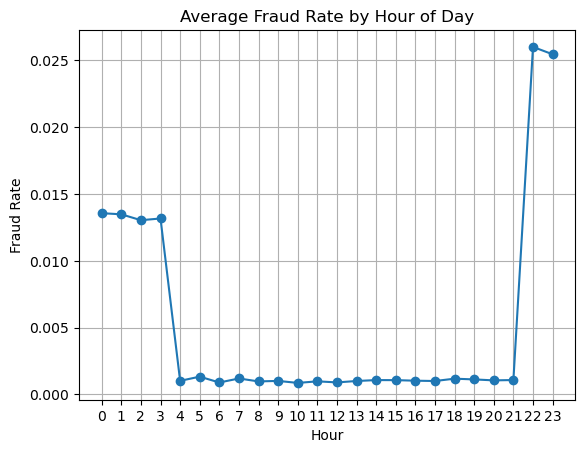

In [39]:
fraud_by_hour = df.groupby('hour')['is_fraud'].mean()

plt.plot(fraud_by_hour.index, fraud_by_hour.values, marker='o')
plt.title('Average Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()


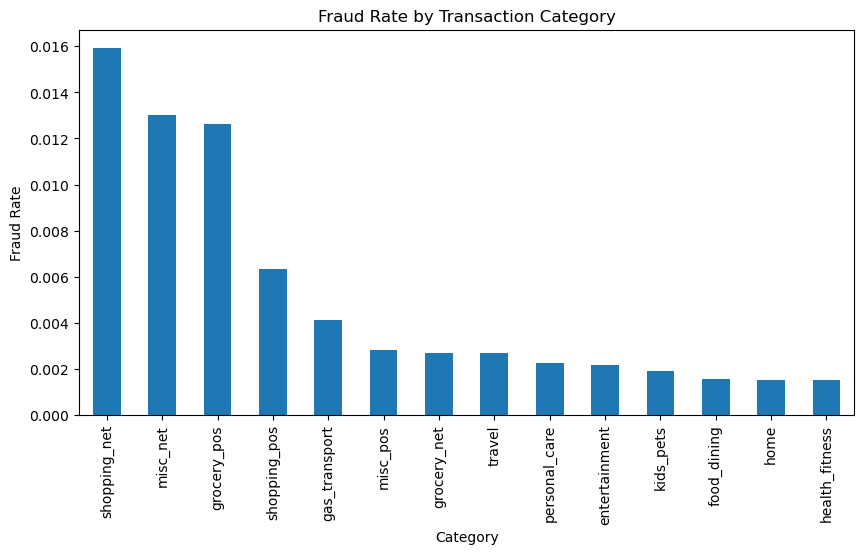

In [40]:
fraud_by_cat = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

fraud_by_cat.plot(kind='bar', figsize=(10,5))
plt.title('Fraud Rate by Transaction Category')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.show()


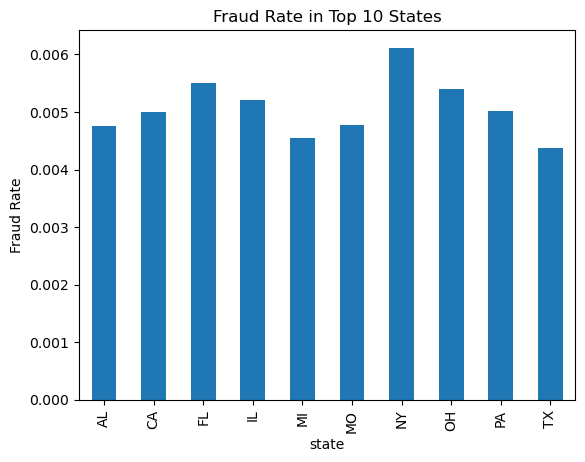

In [41]:
top_states = df['state'].value_counts().head(10).index
state_fraud = df[df['state'].isin(top_states)].groupby('state')['is_fraud'].mean()

state_fraud.plot(kind='bar', title='Fraud Rate in Top 10 States')
plt.ylabel('Fraud Rate')
plt.show()


# CO-RELATION MATRIX


In [43]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])
corr = numeric_df.corr()




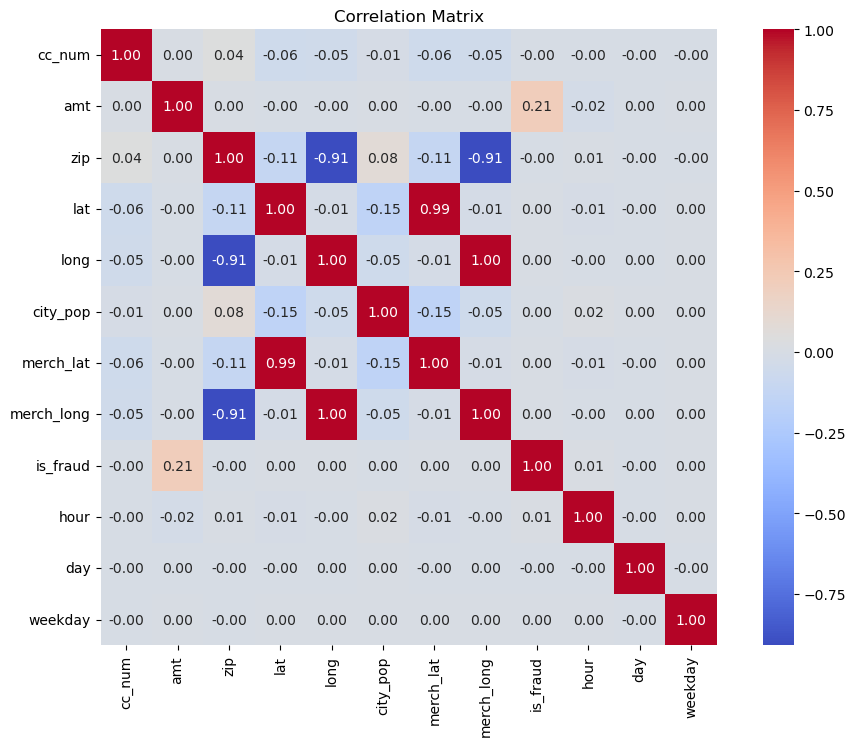

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()


In [45]:
df.drop(['lat', 'long'], axis=1, inplace=True)


features lat and long represent the geographic location of the customer, while merch_lat and merch_long represent the merchant's location. After performing a correlation analysis, we found that lat had a +0.99 correlation with merch_lat and long had a +1.00 correlation with merch_long. This indicates that the customer's location and the merchant's location are nearly identical across the dataset, meaning they provide redundant information. To reduce multicollinearity, simplify the feature space, and prevent the model from overemphasizing duplicate patterns, we decided to drop lat and long. Retaining only the merchant’s location (merch_lat, merch_long) makes the data cleaner and more interpretable, especially since fraudulent transactions are more likely to be associated with where the money is spent rather than the origin of the customer



# Distribution of Transaction Amount

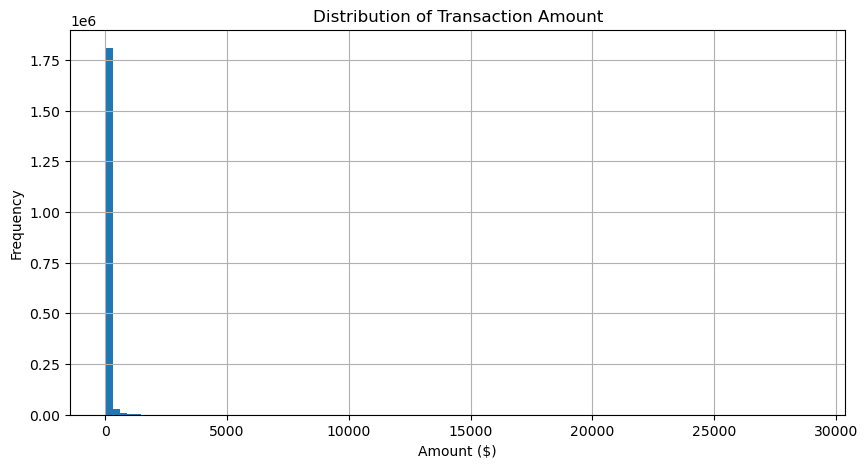

In [46]:
import matplotlib.pyplot as plt

df['amt'].hist(bins=100, figsize=(10,5))
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.show()

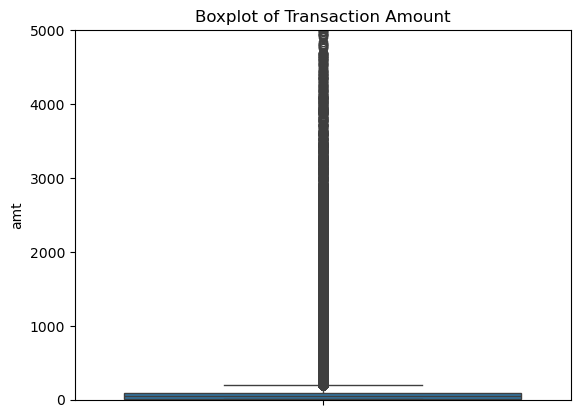

In [47]:
sns.boxplot(data=df, y='amt')
plt.title('Boxplot of Transaction Amount')
plt.ylim(0, 5000)  # Limit axis to better see detail
plt.show()


# applying log transformation to reduce skewness

In [49]:
import numpy as np
df['log_amt'] = np.log1p(df['amt'])


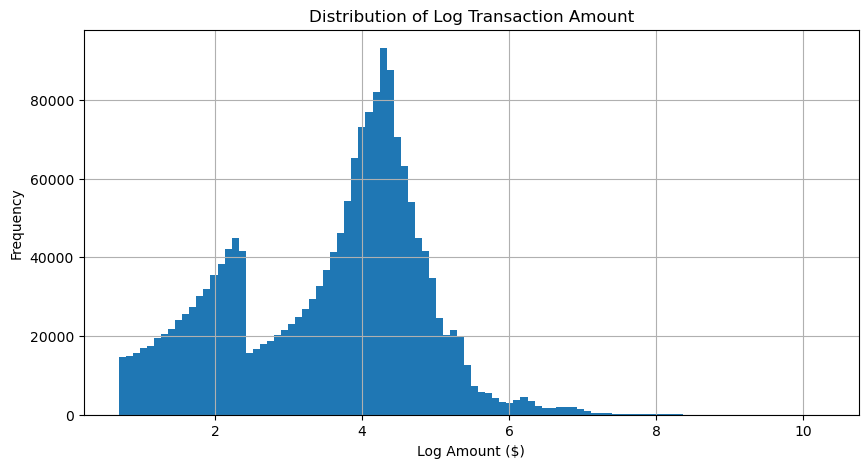

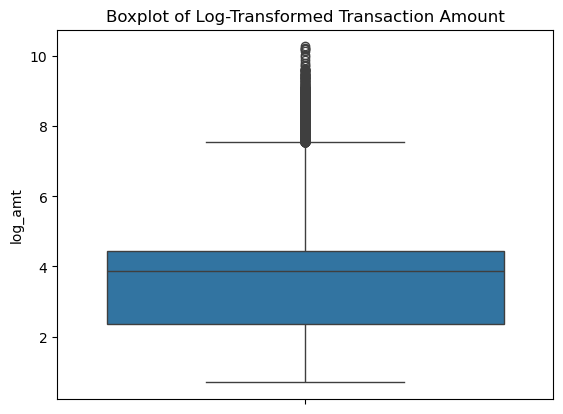

In [51]:
# rechecking distribution after log transformation
df['log_amt'].hist(bins=100, figsize=(10,5))
plt.title('Distribution of Log Transaction Amount')
plt.xlabel('Log Amount ($)')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(data=df, y='log_amt')
plt.title('Boxplot of Log-Transformed Transaction Amount')
plt.show()


In [52]:
# categorize transaction amount into bins
df['amt_bin'] = pd.cut(df['amt'], bins=[0, 50, 200, 500, 1000, 5000, np.inf], labels=[1, 2, 3, 4, 5, 6])


# feature engineering 

In [ ]:
#is_online: From category
#Online categories like shopping_net, misc_net, etc. tend to be fraud-prone:
df['is_online'] = df['category'].str.contains('_net').astype(int)


In [ ]:
#Transactions at riskier hours
#Fraud happens more often at night (10 PM – 1 AM):



df['is_night'] = df['hour'].apply(lambda x: 1 if x in [22, 23, 0, 1] else 0)


In [ ]:
#is_high_amt: Flag high-value transactions
# From your boxplot + KDE, you know higher amounts are more fraud-prone
df['is_high_amt'] = (df['amt'] > 1000).astype(int)


In [62]:
# Categorize transaction amounts
df['amt_bin'] = pd.cut(df['amt'],
                       bins=[0, 50, 200, 500, 1000, 5000, float('inf')],
                       labels=[1, 2, 3, 4, 5, 6])


# View engineered features

In [63]:
df[['log_amt', 'is_night', 'is_online', 'is_high_amt', 'amt_bin']].head()


,log_amt,is_night,is_online,is_high_amt,amt_bin
0,1.786747,1,1,0,1
1,4.684259,1,0,0,2
2,5.398660,1,0,0,3
3,3.828641,1,0,0,1
4,3.760269,1,0,0,1
